In [1]:
import os
from os.path import join, basename
import numpy as np
import pandas as pd
import rioxarray
import matplotlib.pyplot as plt
import rasterio

In [2]:
home_dir = '/home/zacharykeskinen/Documents/uavsar/'
data_dir = join(home_dir,'data')
url_dir = join(data_dir, 'urls')
imgs_dir = join(home_dir, 'imgs')

In [5]:
loc_dir = (join(imgs_dir, os.listdir(imgs_dir)[0]))
for img in os.listdir(loc_dir):
    print(img)
    if img == 'lowman_05208_21019-019_21021-007_0006d_s01_L090HH_01.amp1.real.tif':
        src = rasterio.open(join(loc_dir, img) )
        in_path = join(loc_dir, img)
    if img == 'lowman_05208_21019_019_210316_L090_CX_01.inc.tif':
        src2 = rasterio.open(join(loc_dir, img) )

lowman_05208_21019-019_21021-007_0006d_s01_L090HH_01.hgt.real.tif
lowman_05208_21019-019_21021-007_0006d_s01_L090VV_01.int.imaginary.tif
lowman_05208_21019_019_210316_L090_CX_01.inc.tif
lowman_05208_21019-019_21021-007_0006d_s01_L090HV_01.int.real.tif
lowman_05208_21019-019_21021-007_0006d.csv
lowman_05208_21019-019_21021-007_0006d_s01_L090HH_01.int.imaginary.tif
lowman_05208_21019-019_21021-007_0006d_s01_L090HH_01.amp2.real.tif
lowman_05208_21019-019_21021-007_0006d_s01_L090HH_01.amp1.real.tif
inc
lowman_05208_21019-019_21021-007_0006d_s01_L090VV_01.cor.real.tif
lowman_05208_21019-019_21021-007_0006d_s01_L090HV_01.hgt.real.tif
lowman_05208_21019-019_21021-007_0006d_s01_L090VH_01.unw.real.tif
lowman_05208_21019-019_21021-007_0006d_s01_L090HV_01.unw.real.tif
lowman_05208_21019-019_21021-007_0006d_s01_L090HV_01.amp2.real.tif
lowman_05208_21019-019_21021-007_0006d_s01_L090HV_01.amp1.real.tif
lowman_05208_21019-019_21021-007_0006d_s01_L090HH_01.unw.real.tif
temp
lowman_05208_21019-019_2102

In [10]:
array = src2.read(1)
# array2 = src2.read(1)
print(array.shape)
print(np.max(array))
print(np.min(array))
# array2.shape

(16417, 26688)
2.030561
-10000.0


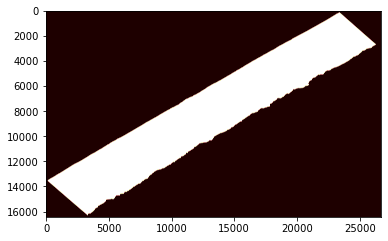

In [8]:
plt.imshow(array, cmap='pink')
plt.show()  
# plt.imshow(array2, cmap='pink')
# plt.show()  

In [9]:
# from rasterio.plot import show_hist
# show_hist(
#      src, bins=50, lw=0.0, stacked=False, alpha=0.3,
#      histtype='stepfilled', title="Histogram")

In [10]:
array.max()

30.866493

In [11]:
array.mean()

0.07526018

In [12]:
array.min()

0.0

In [13]:
src.crs

CRS.from_epsg(26911)

In [14]:
src.bounds

BoundingBox(left=553859.6221955194, bottom=4822498.443121072, right=674122.4174766277, top=4931021.2988628335)

In [15]:
src.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 23940, 'height': 21603, 'count': 1, 'crs': CRS.from_epsg(26911), 'transform': Affine(5.023508574816554, 0.0, 553859.6221955194,
       0.0, -5.023508574816554, 4931021.2988628335), 'tiled': False, 'interleave': 'band'}

In [16]:
src.transform

Affine(5.023508574816554, 0.0, 553859.6221955194,
       0.0, -5.023508574816554, 4931021.2988628335)

In [17]:
os.path.exists('/home/zacharykeskinen/Documents/uavsar/imgs/scratch/')

True

In [18]:
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rasterio as rio
dst_crs = 'EPSG:4326' 
out_path = '/home/zacharykeskinen/Documents/uavsar/imgs/scratch/amp1_wgs.tif'
# Use rasterio package as rio to open and project the raster

with rio.open(in_path) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
 

    # Use rasterio package as rio to write out the new projected raster
    # Code uses loop to account for multi-band rasters
    with rio.open(out_path, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
            source=rio.band(src, i),
            destination=rio.band(dst, i),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.nearest) 

In [1]:
# Use rasterio to import the reprojected data as img
import rasterio as rio
out_path = '/home/zacharykeskinen/Documents/uavsar/imgs/scratch/amp1_wgs.tif'

with rio.open(out_path) as src:
    boundary = src.bounds
    img = src.read()
    nodata = src.nodata

In [ ]:
import folium

# Create a map using Stamen Terrain, centered on study area with set zoom level
m = folium.Map(location=[40.06, -105.30],
                   tiles='Stamen Terrain', zoom_start = 13)

# Overlay raster called img using add_child() function (opacity and bounding box set)
m.add_child(folium.raster_layers.ImageOverlay(img[0], opacity=.7, 
                                 bounds =[[boundary[1], boundary[0]], [boundary[3], boundary[2]]]))

# Display map 
m

In [ ]:
import folium

# Create a map using Stamen Terrain, centered on study area with set zoom level
m = folium.Map(location=[40.06, -105.30], zoom_start = 13)

# Overlay raster called img using add_child() function (opacity and bounding box set)
m.add_child(folium.raster_layers.ImageOverlay(img[0], opacity=.7, 
                                 bounds =[[boundary[1], boundary[0]], [boundary[3], boundary[2]]]))


# Add marker for Boulder, CO
folium.Marker(
    location=[40.009515, -105.242714], # coordinates for the marker (Earth Lab at CU Boulder)
    popup='Earth Lab at CU Boulder', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Display map 
m